In [1]:
import numpy as np
import os
import PIL as pil
from PIL import Image as image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar=True, cache_dir='.',)

In [4]:
data_dir


'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('./*'))

[WindowsPath('datasets/flower_photos/daisy'),
 WindowsPath('datasets/flower_photos/dandelion'),
 WindowsPath('datasets/flower_photos/LICENSE.txt'),
 WindowsPath('datasets/flower_photos/roses'),
 WindowsPath('datasets/flower_photos/sunflowers'),
 WindowsPath('datasets/flower_photos/tulips')]

In [7]:
roses = list(data_dir.glob('roses/*'))

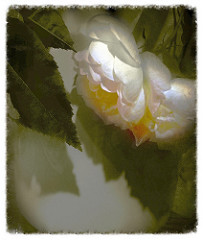

In [8]:
pil.Image.open(str(roses[67]))

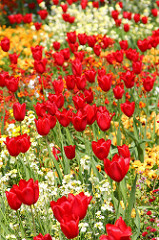

In [9]:
tulips = list(data_dir.glob('tulips/*'))
pil.Image.open(str(tulips[98]))

In [10]:
flower_dir = {'roses' : list(data_dir.glob('roses/*')),
              'tulips' : list(data_dir.glob('tulips/*')),
              'dandelion' : list(data_dir.glob('dandelion/*')),
              'daisy' : list(data_dir.glob('daisy/*')),
              'sunflowers' : list(data_dir.glob('sunflowers/*'))}
 
flower_label = {'roses' : 0,
                'tulips' : 1, 
                'dandelion': 2,
                'daisy' : 3,
                'sunflowers': 4}

In [11]:
flower_dir['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

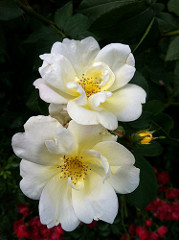

In [12]:
image.open(str(flower_dir['roses'][0]))

In [13]:
img = cv2.imread(str(flower_dir['roses'][0]))
img.shape

(240, 179, 3)

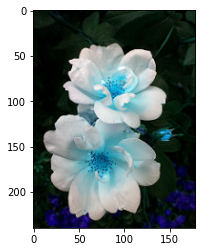

In [14]:
plt.imshow(img)

In [15]:
img.resize(180,180,3, refcheck=False)
img.shape

(180, 180, 3)

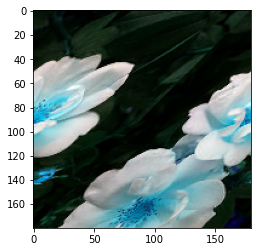

In [16]:
plt.imshow(img)

In [17]:
X = []
y = []
for flr_name , images in flower_dir.items():
    for image in images:
        img = cv2.imread(str(image))
        img.resize(180,180,3, refcheck=False)
        X.append(img)
        y.append(flower_label[flr_name])
        
        '''img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_label[flr_name])'''
                              

In [18]:
print(type(X[5]))
print(X[5].shape)

<class 'numpy.ndarray'>
(180, 180, 3)


In [19]:
y[:6]

[0, 0, 0, 0, 0, 0]

In [20]:
X = np.array(X)
y = np.array(y)
print(type(X[5]))
print(X[5].shape)

<class 'numpy.ndarray'>
(180, 180, 3)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state = 6, test_size = 0.2)
[len(i) for i in [X_train, y_train, X_test, y_test]]

[2936, 2936, 734, 734]

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [24]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(.1),
    layers.experimental.preprocessing.RandomFlip(),
layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),])

In [29]:
num_classes = 5

model = keras.Sequential([
  data_aug,
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer = 'adam',
             loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = 'accuracy')

In [31]:
model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
92/92 [==============================] - 8s 65ms/step - loss: 1.6143 - accuracy: 0.2804
Epoch 2/30
92/92 [==============================] - 5s 57ms/step - loss: 1.4152 - accuracy: 0.3670
Epoch 3/30
92/92 [==============================] - 5s 57ms/step - loss: 1.3533 - accuracy: 0.4121
Epoch 4/30
92/92 [==============================] - 5s 56ms/step - loss: 1.2949 - accuracy: 0.4140
Epoch 5/30
92/92 [==============================] - 5s 56ms/step - loss: 1.2323 - accuracy: 0.4823
Epoch 6/30
92/92 [==============================] - 5s 56ms/step - loss: 1.1988 - accuracy: 0.4732
Epoch 7/30
92/92 [==============================] - 5s 56ms/step - loss: 1.1879 - accuracy: 0.4874
Epoch 8/30
92/92 [==============================] - 5s 55ms/step - loss: 1.1826 - accuracy: 0.5030
Epoch 9/30
92/92 [==============================] - 5s 55ms/step - loss: 1.1610 - accuracy: 0.4990
Epoch 10/30
92/92 [==============================] - 5s 56ms/step - loss: 1.1104 - accuracy: 0.5368
Epoch 11/

In [32]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 1s 33ms/step - loss: 289.4698 - accuracy: 0.3965


[289.4697570800781, 0.3964577615261078]